In [243]:
%matplotlib notebook
%matplotlib inline
import pandas as pd
import os
import csv
import numpy as np
import geopandas as gpd
import gmaps
import gmaps.datasets
import uszipcode
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
primary_type = []

In [244]:
#establishing path to the csv file
csvpath = os.path.join("clean_crime_df.csv")

#creating DataFrame of csv data
crime_df = pd.read_csv(csvpath)

#printing DataFrame info
crime_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12016034,JD193556,01/01/2020 12:00:00 AM,018XX N WINNEBAGO AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,32.0,22.0,11,1160263.0,1912391.0,2020,03/26/2020 03:45:12 PM,41.915306,-87.686639,"(41.915306069, -87.686639247)"
1,12220321,JD430436,01/01/2020 12:00:00 AM,091XX S DREXEL AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,...,8.0,47.0,17,1184157.0,1844395.0,2020,12/19/2020 03:45:59 PM,41.728192,-87.600985,"(41.728192429, -87.600985433)"
2,12013828,JD191019,01/01/2020 12:00:00 AM,044XX S LAVERGNE AVE,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,...,22.0,56.0,02,1143770.0,1874726.0,2020,03/28/2020 03:47:02 PM,41.812274,-87.748177,"(41.81227369, -87.748176594)"
3,12019692,JD197444,01/01/2020 12:00:00 AM,032XX N LINCOLN AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,47.0,6.0,11,1164983.0,1921507.0,2020,04/01/2020 03:50:17 PM,41.940222,-87.669039,"(41.940221932, -87.669039008)"
4,12036792,JD216459,01/01/2020 12:00:00 AM,072XX S WHIPPLE ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,...,18.0,66.0,11,1157290.0,1856526.0,2020,04/29/2020 03:53:17 PM,41.762067,-87.699077,"(41.762066981, -87.699077348)"


In [245]:
crime_df.count()

ID                      409763
Case Number             409763
Date                    409763
Block                   409763
IUCR                    409763
Primary Type            409763
Description             409763
Location Description    409763
Arrest                  409763
Domestic                409763
Beat                    409763
District                409763
Ward                    409763
Community Area          409763
FBI Code                409763
X Coordinate            409763
Y Coordinate            409763
Year                    409763
Updated On              409763
Latitude                409763
Longitude               409763
Location                409763
dtype: int64

In [246]:
crimes_district = crime_df["District"].value_counts()
crimes_district

11    27692
6     27214
8     25526
4     24305
7     21997
25    21750
3     21227
12    20396
5     19538
10    18936
2     18590
18    18271
19    18195
9     18062
1     16920
15    16626
16    14861
22    13842
24    13281
14    13075
17    11438
20     8003
31       18
Name: District, dtype: int64

Text(0.5, 1.0, 'Percent of Crimes by District')

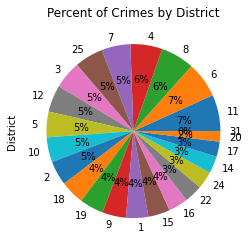

In [247]:
chart = crimes_district.plot(kind="pie", autopct="%1.0f%%")

chart.set_title("Percent of Crimes by District")


In [248]:
from uszipcode import SearchEngine
engine = SearchEngine()
zipcodes = engine.by_coordinates(41.8781, -87.6298, radius=30)
for zipcode in zipcodes:   print(zipcode.zipcode, zipcode.major_city, zipcode.population)

60602 Chicago 1204
60603 Chicago 493
60604 Chicago 570
60606 Chicago 2308
60661 Chicago 7792


In [249]:
crime_df.rename(columns={"District": "dist_num"}, inplace=True)
crime_df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'dist_num', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [250]:
crime_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12016034,JD193556,01/01/2020 12:00:00 AM,018XX N WINNEBAGO AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,32.0,22.0,11,1160263.0,1912391.0,2020,03/26/2020 03:45:12 PM,41.915306,-87.686639,"(41.915306069, -87.686639247)"
1,12220321,JD430436,01/01/2020 12:00:00 AM,091XX S DREXEL AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,...,8.0,47.0,17,1184157.0,1844395.0,2020,12/19/2020 03:45:59 PM,41.728192,-87.600985,"(41.728192429, -87.600985433)"
2,12013828,JD191019,01/01/2020 12:00:00 AM,044XX S LAVERGNE AVE,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,False,...,22.0,56.0,02,1143770.0,1874726.0,2020,03/28/2020 03:47:02 PM,41.812274,-87.748177,"(41.81227369, -87.748176594)"
3,12019692,JD197444,01/01/2020 12:00:00 AM,032XX N LINCOLN AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,APARTMENT,False,False,...,47.0,6.0,11,1164983.0,1921507.0,2020,04/01/2020 03:50:17 PM,41.940222,-87.669039,"(41.940221932, -87.669039008)"
4,12036792,JD216459,01/01/2020 12:00:00 AM,072XX S WHIPPLE ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,...,18.0,66.0,11,1157290.0,1856526.0,2020,04/29/2020 03:53:17 PM,41.762067,-87.699077,"(41.762066981, -87.699077348)"


In [251]:
chicago = 'Boundaries - Police Districts (current)-3/geo_export_adf110ec-6329-4c87-aa2d-4b05fc948e42.shp'
regions = gpd.read_file(chicago)

regions.sample(5)

,dist_label,dist_num,geometry
4,19TH,19,"POLYGON ((-87.64492 41.96973, -87.64431 41.969..."
9,5TH,5,"POLYGON ((-87.58776 41.72231, -87.58762 41.722..."
15,11TH,11,"POLYGON ((-87.70679 41.90283, -87.70679 41.902..."
2,31ST,31,"POLYGON ((-87.82818 41.98384, -87.82816 41.983..."
1,20TH,20,"POLYGON ((-87.66029 41.99092, -87.66029 41.990..."


<AxesSubplot:>

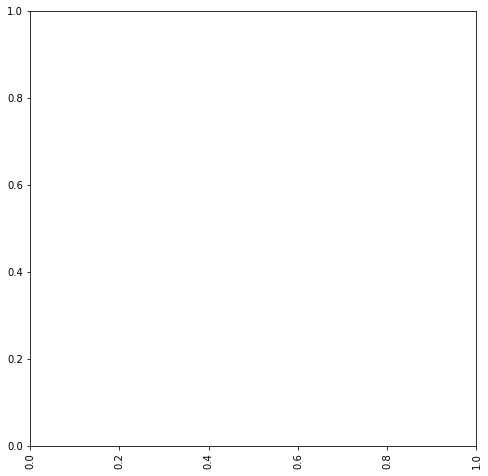

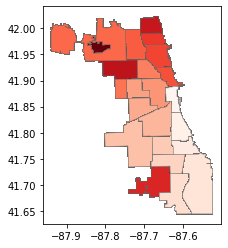

In [252]:
regions['dist_num'] = regions['dist_num'].astype(int)
map_and_stats=regions.merge(crime_df, on="dist_num")

map_and_stats.plot(column="dist_num", cmap="Reds", linewidth=0.4, edgecolor=".4")